# Project Bimbingan Karir

**Link Github : https://github.com/fidelarf/A11.2020.12533_FidelaPA_BKDS08/blob/main/A11_2020_12533_FidelaPA_BKDS08.ipynb**

Nama : Fidela Putri Arifianti

NIM  : A11.2020.12533

Kelas : BKDS08 – Bimbingan Karier Data Science


Daftar Isi

---


### 1.  Pengumpulan Data
### 2.  Menelaah Data
### 3.	 Validasi Data
### 4.  Menetukan Object Data
### 5.  Membersihkan Data
### 6. Konstruksi Data
### 7. Modelling
### 8. Evaluasi
### 9. Streamlit
### 10. Kesimpulan

---

## 1. Pengumpulan Data

Dataset yang digunakan adalah dataset yang bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease
Dataset yang dipakai adalah dataset dengan nama file "Hungarian.data" diharapkan sebelum memakai dataset tersebut anda dapat membaca deskripsi dataset yang ada di dalam file "heart-disease.names"


Pengumpulan data merupakan tahap awal dalam proses analisis data. Pada tahap ini, data diperoleh dari berbagai sumber sesuai dengan tujuan analisis yang dilakukan. Pertama-tama, pengumpulan data dimulai dengan pemilihan dataset yang akan digunakan. Dalam kasus ini, dataset berasal dari sumber yang disebutkan, yaitu https://archive.ics.uci.edu/dataset/45/heart+disease. Dataset ini memiliki nama file "Hungarian.data" yang akan digunakan untuk analisis atau eksperimen tertentu.

Dataset yang digunakan ini memiliki 76 atribut, tetapi eksperimen yang dipublikasikan umumnya menggunakan subset dari 14 atribut. Fokus utama eksperimen terletak pada basis data Cleveland, yang merupakan satu-satunya yang digunakan oleh peneliti Machine Learning. Bidang "goal" mengindikasikan keberadaan penyakit jantung pada pasien dengan nilai integer dari 0 (tidak ada keberadaan) hingga 4. Eksperimen umumnya berusaha membedakan keberadaan (nilai 1, 2, 3, 4) dari ketidakhadiran (nilai 0).
Informasi identitas pasien, seperti nama dan nomor asuransi sosial, telah dihapus dan digantikan dengan nilai palsu. Salah satu file telah diolah untuk basis data Cleveland, dan keempat file yang belum diolah juga ada dalam direktori.

Penting untuk membaca deskripsi dataset yang terdapat dalam file "heart-disease.names" sebelum menggunakan dataset tersebut. Deskripsi ini akan memberikan informasi tentang variabel-variabel yang ada dalam dataset, makna setiap variabel, dan konteks umumnya. Ini membantu peneliti atau pengguna dataset untuk memahami struktur data, mengidentifikasi variabel kunci, dan membuat interpretasi yang tepat saat menganalisis hasil.

##2. Menelaah Data

Setelah data terkumpul, langkah selanjutnya adalah menelaah data. Pada tahap ini, analisis awal dilakukan untuk memahami struktur, karakteristik, dan konten dari dataset. Tujuan dari menelaah data adalah untuk mendapatkan wawasan awal tentang informasi yang terkandung dalam dataset sebelum memasuki tahap analisis lebih lanjut.

pilih dan masukan library yang anda butuhkan untuk menelaah data

In [8]:
import pandas as pd
import re
import numpy as np
import itertools

### a. Load Data

masukkan dataset yang dibutuhkan dengan alamat penyimpanan yang tepat dan simpan kedalam sebuah variabel

In [9]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Maukan dataset yang digunakan
dir = '/content/drive/MyDrive/hungarian.data'

Mounted at /content/drive


buatlah iterasi untuk membaca dataset

In [10]:
# Iterasi untuk membaca dataset
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

In [11]:
# Menampilkan 10 baris pertama dataset
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

Penjelasan:

* Pada bagian ini, library yang digunakan
adalah pandas untuk manipulasi data, re untuk manipulasi string, dan numpy untuk operasi numerik.
* Dataset dimasukkan dari alamat penyimpanan yang telah ditentukan ke dalam variabel dir.
* Menggunakan open untuk membuka file dataset dan membaca setiap baris, kemudian menyimpannya dalam bentuk list yang disebut lines.
* Menampilkan 10 baris pertama dataset untuk memberikan gambaran awal.

### b. Membuat Dataframe

setelah membaca file dataset lakukan iterasi sesuai jumlah kolom dan baris yang ada pada dataset. Untuk keterangan kolom dan baris dapat dilihat melalui deskripsi dataset yang sudah dijelaskan sebelumnya

In [12]:
# Membaca file dataset sesuai jumlah kolom dan baris yang ada
data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines),10))
)

In [13]:
# Membuat dataframe dari data
df = pd.DataFrame.from_records(data)

In [14]:
# Menampilkan 5 baris pertama dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


Penjelasan:
* Menggunakan itertools.takewhile untuk membaca dataset berdasarkan panjang setiap baris yang sama (76 karakter).
* Menggabungkan 10 baris menjadi satu string, kemudian memisahkannya berdasarkan spasi.
* Membuat dataframe (df) dari data yang telah dibaca.
* Menampilkan 5 baris pertama dari dataframe untuk melihat struktur data.

### b. Informasi Data

menampilan informasi dari file dataset yang sudah dimasukkan kedalam dataframe

In [15]:
# Menampilkan informasi dataset yang sudah dimasukkan ke dalam dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Penjelasan:
* Menggunakan info() pada dataframe untuk mendapatkan informasi tentang dataset, seperti jumlah kolom, jumlah non-null values, dan tipe data setiap kolom.

### b. Validasi Data

Pada kondisi dataset yang kita miliki terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data untuk tipe data object atau string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [16]:
# Menghapus fitur pada kondisi dataset yang memiliki nilai null disimbolkan dengan angka -9.0
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [17]:
# Mengubah tipe data dataset menjadi float sesuai dengan nilai null yaitu -9.0
df = df.astype(float)

In [18]:
# Menampilkan informasi setelah validasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

Penjelasan:
* Menggunakan iloc untuk menghapus kolom terakhir yang tidak diperlukan dan drop untuk menghapus kolom pertama yang berisi identitas.
* Mengubah tipe data seluruh dataset menjadi float sesuai dengan representasi nilai null (-9.0).
* Menampilkan informasi setelah validasi data untuk memastikan perubahan telah dilakukan.

Dengan langkah-langkah ini, dataset telah dimuat, diproses, dan disiapkan untuk analisis lebih lanjut.

## 3. Validasi Data

Validasi data merupakan tahap untuk memastikan kualitas dan integritas data. Ini melibatkan identifikasi dan penanganan terhadap nilai yang tidak valid, outliers, atau kesalahan input. Proses validasi juga dapat mencakup pemeriksaan konsistensi antar variabel serta memastikan bahwa data memenuhi standar atau aturan yang ditetapkan. Validasi data sangat penting untuk memastikan kehandalan analisis yang akan dilakukan.

Pada tahap ini bertujuan untuk mengetahui dan memahami isi dari dataset agar dapat dilakukan penanganan sesuai dengan kondisinya mengubah nilai -9.0 menjadi nilai null value sesuai dengan deskripsi dataset


### a. Mengubah Nilai -9.0 Menjadi Null Value

In [19]:
# Mengubah Nilai -9.0 Menjadi Null Value
df.replace(-9.0, np.nan, inplace=True)

Penjelasan:
* Menggunakan fungsi replace pada dataframe untuk mengganti nilai -9.0 dengan nilai null (np.nan).
* inplace=True digunakan untuk mengubah data secara langsung di dataframe.

### b. Menghitung Jumlah Null Value

In [20]:
# Menghitung Jumlah Null Value
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

Penjelasan:
* Menggunakan isnull() pada dataframe untuk mendeteksi nilai null.
* sum() digunakan untuk menghitung jumlah null value pada setiap kolom.

### c. Tampilan Dataset Setelah Validasi

In [21]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


Penjelasan:
* Dataset ditampilkan setelah nilai -9.0 diubah menjadi null value.
* Dapat terlihat nilai null (NaN) pada beberapa kolom.

Nilai NaN dalam analisis data dapat mempengaruhi hasil analisis dan interpretasi data. Beberapa alasan mengapa nilai NaN perlu mendapatkan perhatian khusus meliputi:
* Kemungkinan Bias Analisis,
jika terdapat banyak nilai NaN dalam satu atau beberapa kolom, hal ini dapat menghasilkan bias dalam analisis statistik atau model yang dibuat. Analisis yang tidak mempertimbangkan nilai NaN secara tepat dapat menghasilkan hasil yang tidak akurat.
*Pengaruh pada Statistik Deskriptif, nilai NaN dapat mempengaruhi perhitungan statistik deskriptif seperti rata-rata (mean), median, dan deviasi standar. Sebagai contoh, jika ada banyak nilai NaN dalam suatu kolom, rata-rata dapat menjadi tidak representatif.
* Dampak pada Visualisasi Data, pada visualisasi data, plot atau grafik yang tidak memperlakukan nilai NaN dengan benar dapat memberikan interpretasi yang salah. Sebagai contoh, garis waktu atau grafik batang mungkin tidak mencerminkan keadaan sebenarnya jika nilai NaN tidak ditangani dengan baik.
* Pengaruh pada Model Machine Learning, model machine learning cenderung tidak dapat mengolah nilai NaN. Oleh karena itu, penting untuk menangani nilai NaN sebelum menggunakan data untuk melatih model. Beberapa model bahkan tidak dapat mengolah data yang mengandung nilai NaN.
* Kesalahan pada Perhitungan, operasi matematika atau perhitungan lainnya yang melibatkan nilai NaN dapat menghasilkan hasil yang tidak terduga atau menyebabkan kesalahan dalam kode program.
* Kesalahan pada Analisis Keseluruhan, jika tidak ditangani dengan benar, nilai NaN dapat menyebabkan kesalahan dalam analisis data secara keseluruhan, terutama jika tidak diperhatikan dengan cermat selama tahap pra-pemrosesan data.

### d. Informasi Data Setelah Validasi

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

Penjelasan:
* Menampilkan informasi setiap kolom setelah proses validasi.
* Dapat dilihat jumlah non-null values pada setiap kolom.

Dengan melakukan validasi data ini, kita telah mengubah nilai -9.0 menjadi null value dan memahami jumlah nilai null pada setiap kolom. Data yang telah divalidasi siap untuk tahapan analisis lebih lanjut.

## 4. Menentukan Object Data

Menentukan objek data melibatkan pemilihan subset data atau variabel yang akan digunakan dalam analisis lebih lanjut. Pada tahap ini, analis memilih fitur atau atribut yang dianggap paling relevan atau signifikan untuk menjawab pertanyaan atau mencapai tujuan analisis. Pemilihan objek data harus didasarkan pada pemahaman yang baik tentang konteks dan tujuan analisis.

Pada tahap ini, kita melakukan pemilihan 14 fitur yang akan digunakan berdasarkan deskripsi dataset. Proses ini melibatkan beberapa langkah:

### a. Memilih 14 fitur yang Akan Digunakan

In [23]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]

In [24]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


Penjelasan:
* Memilih 14 fitur yang akan digunakan dari dataset menggunakan indeks kolom.
* Menampilkan 5 baris pertama dari dataframe yang hanya berisi 14 fitur yang telah dipilih.

### b. Informasi Data Setelah Pemilihan Fitur

In [25]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Penjelasan:

* Menampilkan informasi tentang dataframe setelah pemilihan 14 fitur.
* Terdapat beberapa kolom yang memiliki nilai null.

### c. Mengganti Nama Kolom

mengganti nama kolom sesuai dengan 14 nama kolom yang ada pada deskripsi dataset

In [26]:
column_mapping = { 2: 'age',
3: 'sex',
8: 'cp',
9: 'trestbps',
11: 'chol',
15: 'fbs',
18: 'restecg',
31: 'thalach',
37: 'exang',
39: 'oldpeak',
40: 'slope',
43: 'ca',
50: 'thal',
57: 'target'
}

In [27]:
df_selected.rename(columns=column_mapping, inplace=True)

<ipython-input-27-e9a4003b4301>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


Penjelasan:

* Mengganti nama kolom dengan menggunakan rename berdasarkan mapping yang telah didefinisikan.

### d. Informasi Data Setelah Penggantian Nama Kolom

In [28]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Penjelasan:

* Menampilkan informasi dataframe setelah penggantian nama kolom.
* Nama kolom telah diperbarui sesuai dengan mapping yang telah ditentukan.

### e. Menghitung Jumlah Fitur pada Dataset

In [29]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

Penjelasan:

* Menampilkan jumlah baris dengan kombinasi nilai unik pada setiap fitur.
Berguna untuk memahami variasi nilai pada dataset.

Dengan melakukan pemilihan 14 fitur dan perubahan nama kolom, kita telah menyiapkan dataset untuk tahapan analisis lebih lanjut.

## 5. Membersihkan Data

Membersihkan data adalah tahap di mana data yang telah dikumpulkan dan ditelaah akan dibersihkan dari nilai yang tidak valid dan duplikat. Proses ini melibatkan penggantian nilai yang hilang dan penghapusan baris atau kolom yang tidak diperlukan yang dapat memengaruhi hasil analisis. Tujuan membersihkan data adalah untuk memastikan bahwa data yang digunakan dalam analisis adalah data yang berkualitas dan dapat diandalkan.

Pembersihan data merupakan tahap krusial sebelum melakukan pemodelan guna memastikan keakuratan model yang dihasilkan. Langkah-langkah pembersihan data melibatkan beberapa proses, seperti mengatasi nilai null, menghapus fitur, mengisi nilai null dengan mean, menghapus duplikat, dan mengevaluasi korelasi antar fitur. Sebelum melakukan pemodelan dilakukan pembersihan data agar model yang dihasilkan lebih akurat menghitung jumlah null values yang ada di dalam dataset.


### a. Menghitung Jumlah Nilai Null

In [30]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Penjelasan:
* Berdasarkan output kode program diatas menunjukkan ada beberapa kolom fitur yang hampir 90% datanya memiliki nilai null
* Perlu dilakukan penghapusan fitur menggunakan fungsi drop untuk mengatasi nilai null

### b. Menghapus Fitur dengan Banyak Null

In [31]:
columns_to_drop = ['ca', 'slope','thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [32]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Penjelasan:

* Menghapus fitur 'ca', 'slope', dan 'thal' yang memiliki banyak nilai null.

### c. Mengisi Nilai Null dengan Mean

Dikarenakan masih ada nilai null dibeberapa kolom fitur maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolomnya

In [33]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

In [34]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)


In [35]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())


mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya



In [36]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}

dfClean = df_selected.fillna(value=fill_values)

In [37]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


Penjelasan:

* Menghitung nilai mean untuk setiap kolom yang memiliki nilai null.
* Mengisi nilai null dengan nilai mean yang telah dihitung sebelumnya.

In [38]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

### d. Menghapus Duplikat

melalukan pengecekan terhadap duplikaksi data

In [39]:
duplicate_rows = dfClean.duplicated()

dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menampilkan baris data yang merupakan duplikat

In [40]:
print("All Duplicate Rows:")

dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menghapus data yang memiliki duplikat

In [41]:
dfClean = dfClean.drop_duplicates()

print("All Duplicate Rows:")

dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [42]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [43]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

### e. Pengecekan Korelasi Antar Fitur

Penjelasan:

* Mencari korelasi antar fitur dan menampilkan heatmap untuk visualisasi.

Dengan melalui proses ini, data telah dibersihkan dan siap untuk digunakan dalam proses pemodelan. Korelasi antar fitur dapat membantu pemahaman lebih lanjut tentang hubungan antar variabel.

mencari korelasi antar fitur


In [45]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

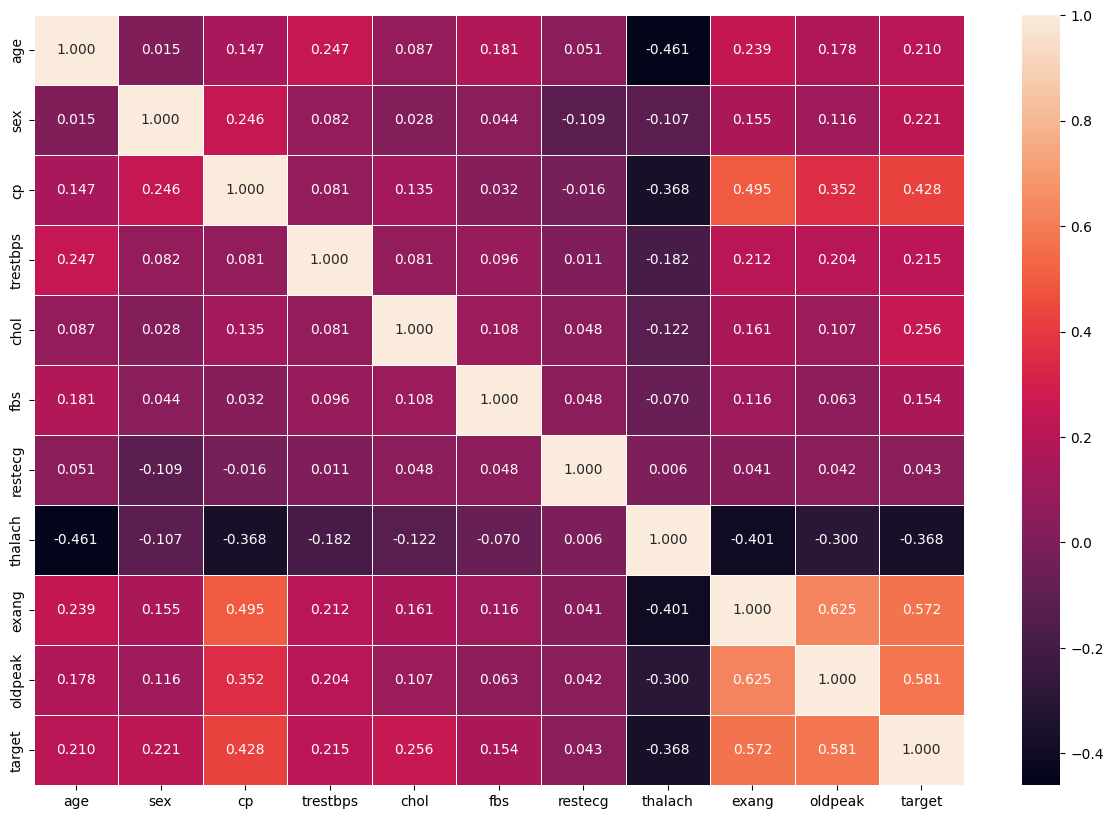

In [46]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

## 6. Konstruksi Data

Dalam tahap ini Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

### a. Informasi Dataset

In [47]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


Output ini memberikan informasi terkait dataset, seperti jumlah baris, nama kolom, non-null counts, dan tipe data setiap kolom. Dalam kasus ini, kita memiliki DataFrame dengan 293 baris dan 11 kolom bertipe data float64.

### b. Tampilan Lima Data Pertama

In [48]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Output ini menampilkan lima baris pertama dari dataset yang telah diubah. Ini memberikan gambaran awal tentang struktur data dan nilai-nilai awal pada setiap kolom.

Setelah Menyesuaikan tipe dataset kita , kita harus memisahkan antara fitur dan target lalu simpan kedalam variabel.

### c. Pemisahan Fitur dan Target

In [49]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

Pada langkah ini, fitur dan target dipisahkan. Variabel X berisi fitur-fitur, sementara variabel y berisi target. Ini diperlukan untuk melatih model dan melakukan prediksi.

Setelah kita memisahkan antara fitur dan target , sebaiknya kita melakukan pengecekan terlebih dahulu terhadap persebaran jumlah target terlebih dahulu.

### d. Visualisasi Persebaran Jumlah Target

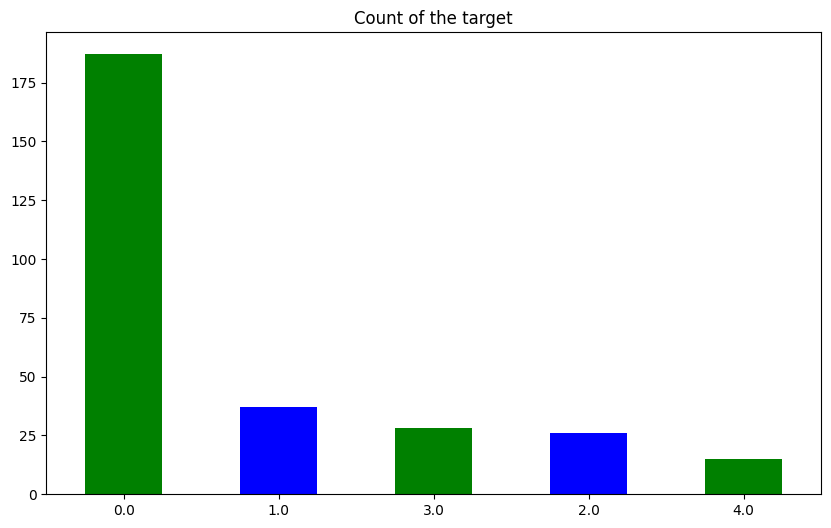

In [50]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Grafik ini menunjukkan persebaran jumlah target dalam bentuk diagram batang. Analisis visual ini dapat membantu mengidentifikasi ketidakseimbangan dalam jumlah target.

Pada Grafik diatas menunjukan bahwa persebaran jumlah target tidak seimbang oleh karena itu perlu diseimbangkan terlebih dahulu.
Menyeimbangkan target ada 2 cara yaitu oversampling dan undersampling. oversampling dilakukan jika jumlah dataset sedikit sedangkan undersampling dilakukan jika jumlah data terlalu banyak.
Disini kita akan melakukan oversampling dikarenakan jumlah data kita tidak banyak. Salah satu metode yang Oversampling yang akan kita gunakan adalah SMOTE.

### e. Oversampling menggunakan SMOTE

In [51]:
from imblearn.over_sampling import SMOTE


# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

Langkah ini melibatkan oversampling menggunakan metode SMOTE untuk menyeimbangkan jumlah target yang tidak seimbang.

### f. Visualisasi Persebaran Jumlah Target Sebelum dan Setelah Oversampling

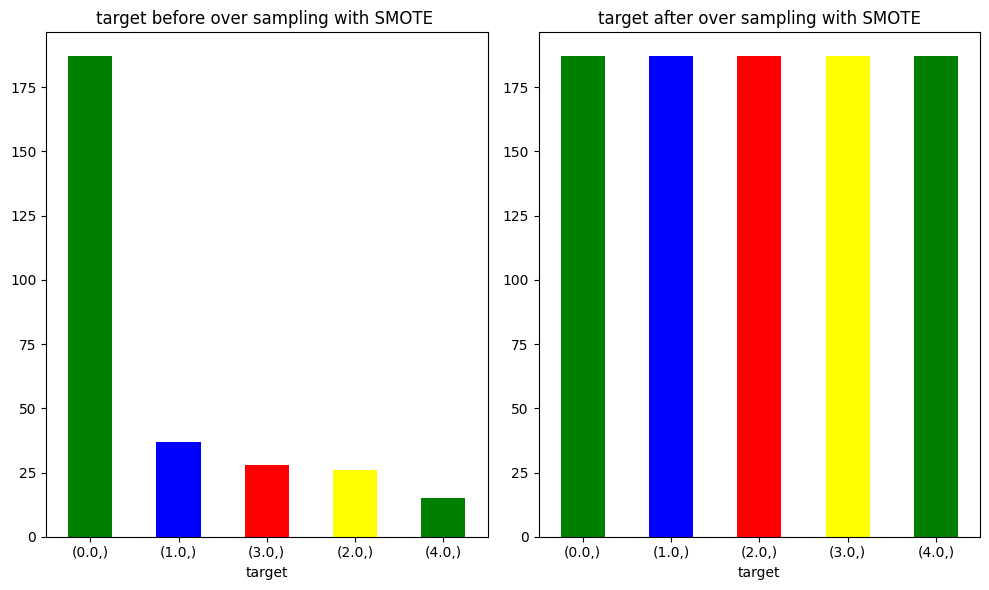

In [127]:
plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);

plt.subplot(1, 2, 2)

new_df2 = pd.DataFrame(data=y_smote_resampled)

new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

Grafik ini membandingkan persebaran jumlah target sebelum dan setelah dilakukan oversampling dengan SMOTE.

Pada Grafik diatas dapat dilihat ketika target belum di seimbangkan dan sudah diseimbangkan menggunakan oversampling.

In [59]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
dtype: int64

In [60]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
dtype: int64

Setelah menyeimbangkan persebaran jumlah target kita akan melakukan mengecekan apakah perlu dilakukan normalisasi/standarisasi pada datset kita.

### g. Deskripsi Statistik Dataset Setelah Oversampling

In [61]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Output ini memberikan statistik deskriptif dari setiap fitur pada dataset, termasuk rata-rata, standar deviasi, nilai minimum, nilai kuartil, dan nilai maksimum.

Pada deskripsi diatas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang kita miliki. Oleh karena itu perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.

### h. Normalisasi/Standarisasi Data

In [62]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)


len(X_smote_resampled_normal)

935

Langkah ini melibatkan normalisasi atau standarisasi data untuk memperkecil rentang nilai dan memastikan setiap fitur memiliki skala yang seragam.

In [63]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test.

### i. Pembagian Data Train dan Test

In [64]:
from sklearn.model_selection import train_test_split


# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)


# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

Data dibagi menjadi set pelatihan dan pengujian untuk melatih model dan mengevaluasi kinerjanya.

## 7. Model

Pada tahap ini kita akan memulai untuk membangun sebuah model.

Dibawah ini merupakan sebuah fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model. Fungsi ini nantinya akan dipanggil di setiap model. Membuat Fungsi ini bersifat opsional.

### a. Fungsi Evaluasi

In [69]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

def evaluation(Y_test,Y_pred):
  acc = accuracy_score(Y_test,Y_pred)
  rcl = recall_score(Y_test,Y_pred,average = 'weighted')
  f1 = f1_score(Y_test,Y_pred,average = 'weighted')
  ps = precision_score(Y_test,Y_pred,average = 'weighted')

  metric_dict={'accuracy': round(acc,3),
             'recall': round(rcl,3),
             'F1 score': round(f1,3),
             'Precision score': round(ps,3)
            }

  return print(metric_dict)

### b. Model Building

Pada tahap ini, Anda membangun tiga model machine learning menggunakan algoritma K-Nearest Neighbors (KNN), Random Forest, dan XGBoost.

### c. Oversample



In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

* KNN

Pada tahap ini kita akan akan memulai membangun model dengan algoritma KNN dengan nilai neighbors yaitu 3.

In [71]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Berikut adalah kode program untuk menampilkan hasil akurasi dengan algoritma KNN

In [72]:
y_pred_knn = knn_model.predict(X_test) # Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



In [73]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.754, 'recall': 0.754, 'F1 score': 0.741, 'Precision score': 0.745}


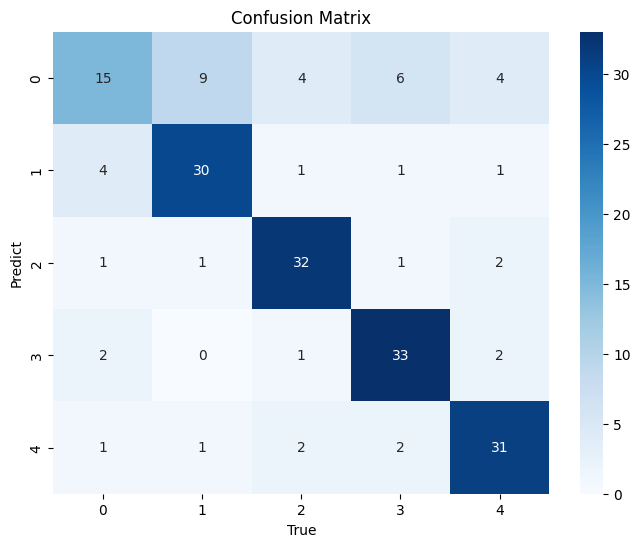

In [74]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

Pada visualisasi ini ditampilkan visualisasi confusion matrix untuk membandingkan hasil prediksi model dengan nilai sebenarnya.

* Random Forest

Selanjutnya kita akan membangun model dengan algoritma random forest dengan n_estimators yaitu 100, n_estimators sendiri berguna
mengatur jumlah pohon keputusan yang akan dibangun

In [75]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [77]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


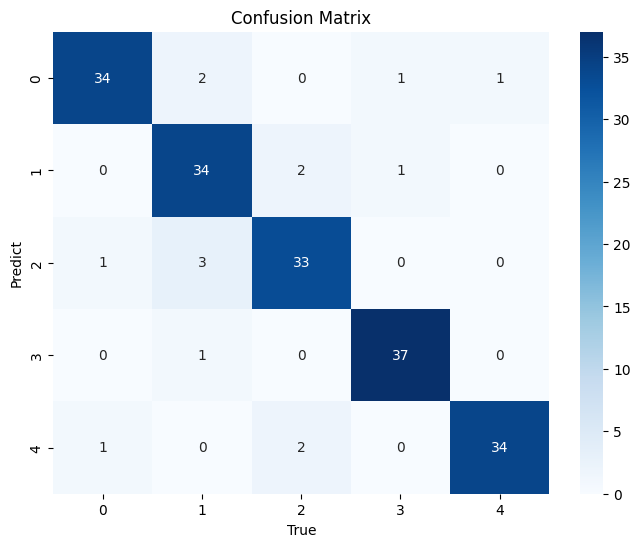

In [80]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

* XGBoost

Pada tahap ini dalam membangun model, kita akan menggunakan algoritma XGBoost dengan learning rate yaitu 0.1. learning rate berguna untuk mengontrol seberapa besar kita menyesuaikan bobot model.

In [81]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [83]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [84]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


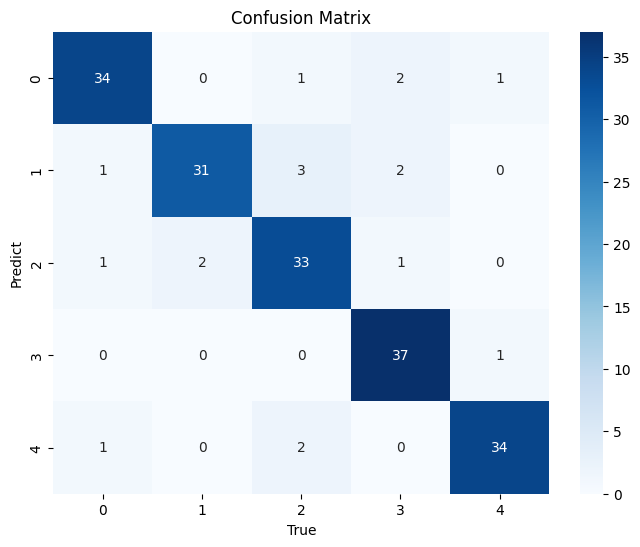

In [87]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### d. Oversample + Normalisasi

Pada bagian ini kita akan membuat sebuah model yang dimana data yang dipakai kali ini yang sudah dilakukan oversample dan normalisasi. Algoritma yang digunakan sama seperti sebelumnya yaitu KNN, Random Forest, dan XGBoost. Sekaligus dibuat visualisasi hasil evaluasi pada masing-masing model.

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

* KNN

In [89]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_normal, y_train_normal)

KNeighborsClassifier(n_neighbors=3)

In [90]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN Model
print("K-Nearest Neighbors (KNN) Model : ")
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy :", accuracy_knn_smote_normal)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model : 
Accuracy : 0.861
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.88      0.76      0.82        38
         1.0       0.78      0.84      0.81        37
         2.0       0.87      0.92      0.89        37
         3.0       0.92      0.87      0.89        38
         4.0       0.87      0.92      0.89        37

    accuracy                           0.86       187
   macro avg       0.86      0.86      0.86       187
weighted avg       0.86      0.86      0.86       187



In [91]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.861, 'recall': 0.861, 'F1 score': 0.861, 'Precision score': 0.863}


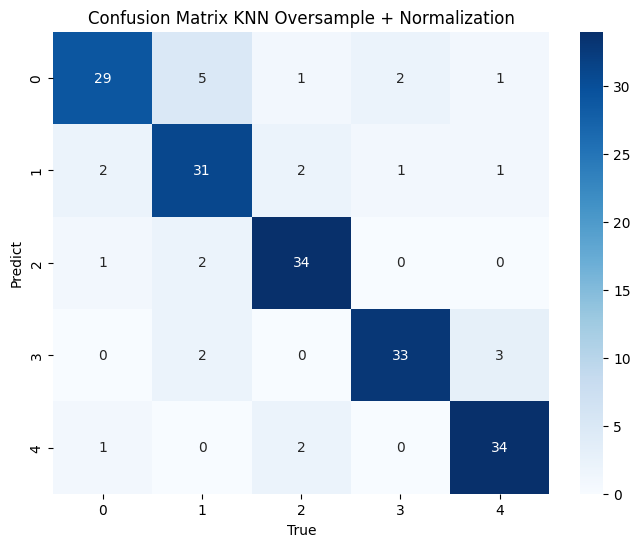

In [92]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix KNN Oversample + Normalization')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

* Random forest

In [93]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [94]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest model
print("Random Forest Model : ")
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy :", accuracy_rf_smote_normal)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_rf))

Random Forest Model : 
Accuracy : 0.92
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [95]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.92, 'Precision score': 0.922}


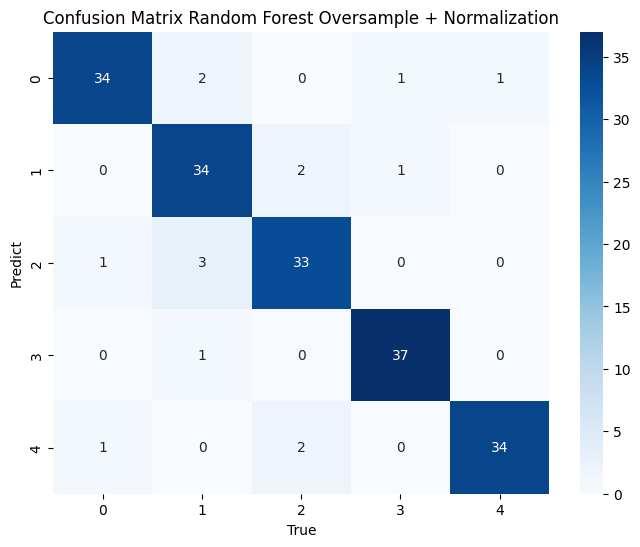

In [96]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Random Forest Oversample + Normalization")
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

* XGBoost

In [97]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [98]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost Model
print("XGBoost Model : ")
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("Accuracy :", accuracy_xgb_smote_normal)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_xgb))

XGBoost Model : 
Accuracy : 0.904
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.94      0.84      0.89        37
         2.0       0.85      0.89      0.87        37
         3.0       0.88      0.97      0.93        38
         4.0       0.94      0.92      0.93        37

    accuracy                           0.90       187
   macro avg       0.91      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



In [99]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.904, 'recall': 0.904, 'F1 score': 0.904, 'Precision score': 0.906}


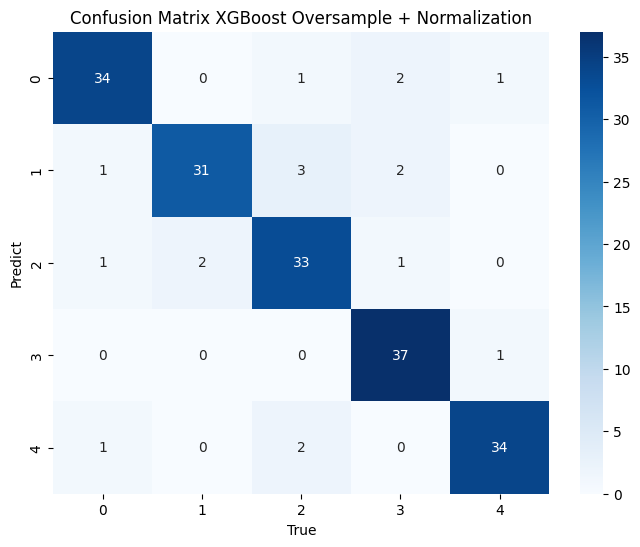

In [100]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix XGBoost Oversample + Normalization')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

### e. Tunning + Normalization + Oversample

Pada pembuatan model kali ini masih menggunakan algoritma yang sama (KNN, Random Forest, dan XGBoost), namun data yang digunakan adalah data yang sudah dilakukan TunnIng Parameter, Normalisasi, dan Oversample.

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

Setiap parameter tunnning tidak selalu sama karena bergantung pada algoritma yang digunakan.

* KNN

In [102]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors" : range(3,21),
    "metric" : ["euclidean", "manhattan", "chebyshev"],
    "weights" : ["uniform", "distance"],
    "algorithm" : ["auto", "ball_tree", "kd_tree"],
    "leaf_size" : range(10,61)
}

knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5)
knn_model.fit(X_train_normal, y_train_normal)
best_params = knn_model.best_params_
print(f"Best parameters : {best_params}")

Best parameters : {'weights': 'distance', 'n_neighbors': 4, 'metric': 'manhattan', 'leaf_size': 49, 'algorithm': 'ball_tree'}


In [103]:
y_pred_knn = knn_model.predict(X_test_normal)

# Evaluate the KNN Model
print("K-Nearest Neighbors (KNN) Model : ")
accuracy_knn_smote_normal_tun = round(accuracy_score(y_test_normal, y_pred_knn), 3)
print("Accuracy :", accuracy_knn_smote_normal_tun)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model : 
Accuracy : 0.93
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.86      0.86      0.86        37
         2.0       0.92      0.92      0.92        37
         3.0       0.97      0.97      0.97        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.93       187
   macro avg       0.93      0.93      0.93       187
weighted avg       0.93      0.93      0.93       187



In [104]:
evaluation(y_test_normal, y_pred_knn)

{'accuracy': 0.93, 'recall': 0.93, 'F1 score': 0.93, 'Precision score': 0.93}


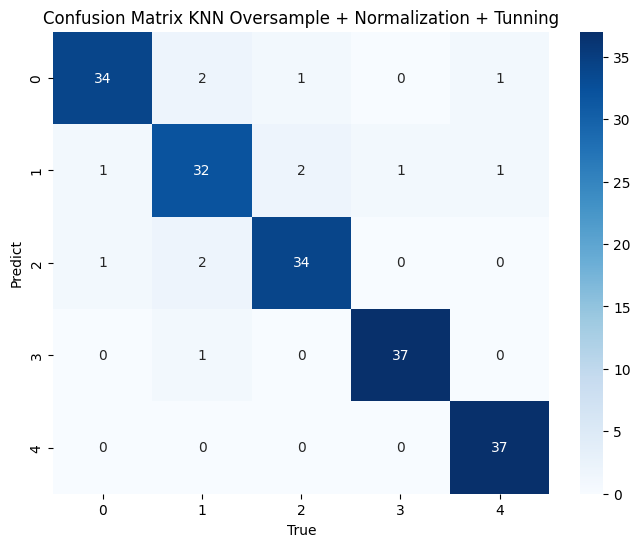

In [105]:
cm = confusion_matrix(y_test_normal, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix KNN Oversample + Normalization + Tunning')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

* Random Forest

In [106]:
rf_model = RandomForestClassifier()

param_grid = {
    "n_estimators" : [100, 200],
    "max_depth" : [10, 15],
    "min_samples_leaf" : [1, 2],
    "min_samples_split" : [2, 5],
    "max_features" : ["sqrt", "log2"],
    # "random_state" : [42, 100, 200]
}

rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

rf_model.fit(X_train_normal, y_train_normal)

best_params = rf_model.best_params_
print(f"Best parameters : {best_params}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [107]:
y_pred_rf = rf_model.predict(X_test_normal)

# Evaluate the Random Forest Model
print("Random Forest Model : ")
accuracy_rf_smote_normal_tun = round(accuracy_score(y_test_normal, y_pred_rf), 3)
print("Accuracy :", accuracy_rf_smote_normal_tun)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_rf))

Random Forest Model : 
Accuracy : 0.898
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.84      0.84      0.84        37
         2.0       0.82      0.86      0.84        37
         3.0       0.92      0.95      0.94        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.90      0.90      0.90       187



In [108]:
evaluation(y_test_normal, y_pred_rf)

{'accuracy': 0.898, 'recall': 0.898, 'F1 score': 0.899, 'Precision score': 0.9}


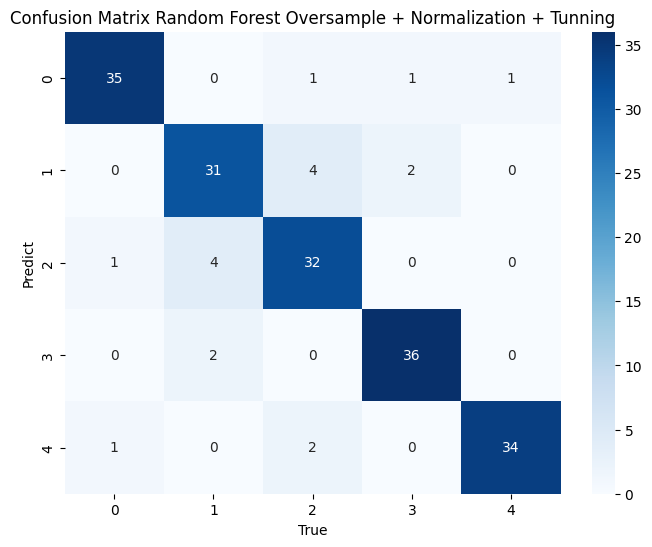

In [109]:
cm = confusion_matrix(y_test_normal, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Random Forest Oversample + Normalization + Tunning')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

* XGBoost

In [110]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth" : [3, 5, 7],
    "learning_rate" : [0.01, 0.1],
    "n_estimators" : [100, 200],
    "gamma" : [0, 0.1],
    "colsample_bytree" : [0.7, 0.8]
}

xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1)

xgb_model.fit(X_train_normal, y_train_normal)

best_params = xgb_model.best_params_
print(f"Best parameters : {best_params}")

Best parameters : {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}


In [111]:
y_pred_xgb = xgb_model.predict(X_test_normal)

# Evaluate the XGBoost model
print("XGBoost Model : ")
accuracy_xgb_smote_normal_tun = round(accuracy_score(y_test_normal, y_pred_xgb), 3)
print("accuracy :", accuracy_xgb_smote_normal_tun)
print("Classification Report : ")
print(classification_report(y_test_normal, y_pred_xgb))

XGBoost Model : 
accuracy : 0.92
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.91      0.86      0.89        37
         2.0       0.89      0.86      0.88        37
         3.0       0.93      1.00      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



In [112]:
evaluation(y_test_normal, y_pred_xgb)

{'accuracy': 0.92, 'recall': 0.92, 'F1 score': 0.919, 'Precision score': 0.92}


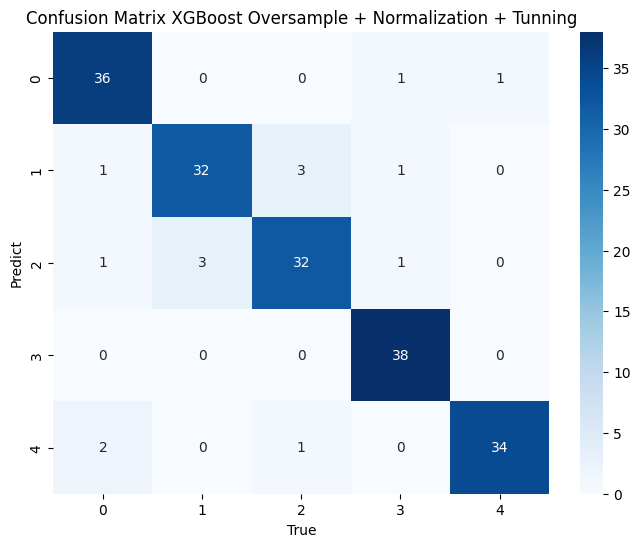

In [113]:
cm = confusion_matrix(y_test_normal, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix XGBoost Oversample + Normalization + Tunning')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## 8. Evaluasi

Evaluasi merupakan tahap penting dalam memahami kinerja model dan membandingkan hasil dari berbagai algoritma. Pada bagian ini, kita akan melakukan evaluasi dengan membandingkan hasil akurasi dari beberapa model algoritma yang telah dibangun. Kita akan melibatkan visualisasi grafik bar untuk mempermudah pemahaman.

Selanjutnya kita akan melakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik.

### a. Oversample Evaluation

Pertama, kita membuat DataFrame untuk membandingkan akurasi dari model K-Nearest Neighbors (KNN), Random Forest, dan XGBoost setelah penerapan oversampling.

In [114]:
import matplotlib.pyplot as plt

model_comp1 = pd.DataFrame({
    'Model': ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy' : [accuracy_knn_smote*100, accuracy_rf_smote*100, accuracy_xgb_smote*100]
})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,90.4


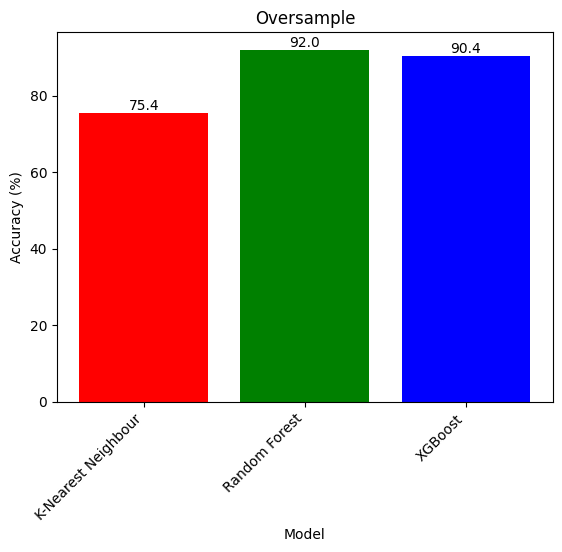

In [115]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right') #untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars :
  yval= bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

### b. Normalization + Oversample Evaluation

In [116]:
model_comp2 = pd.DataFrame({
    'Model' : ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy' : [accuracy_knn_smote_normal*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal*100]
})
model_comp2.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.1
1,Random Forest,92.0
2,XGBoost,90.4


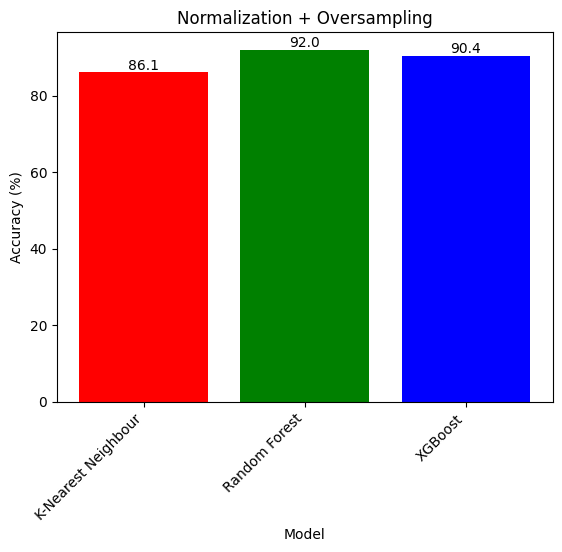

In [117]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,2), ha='center', va='bottom')
plt.show()

### c. Normalization + Oversample + Tuning Evaluation

In [118]:
model_comp3 = pd.DataFrame({
    'Model' : ['K-Nearest Neighbour', 'Random Forest', 'XGBoost'],
    'Accuracy' : [accuracy_knn_smote_normal_tun *100, accuracy_rf_smote_normal_tun*100, accuracy_xgb_smote_normal_tun*100]
})
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,93.0
1,Random Forest,89.8
2,XGBoost,92.0


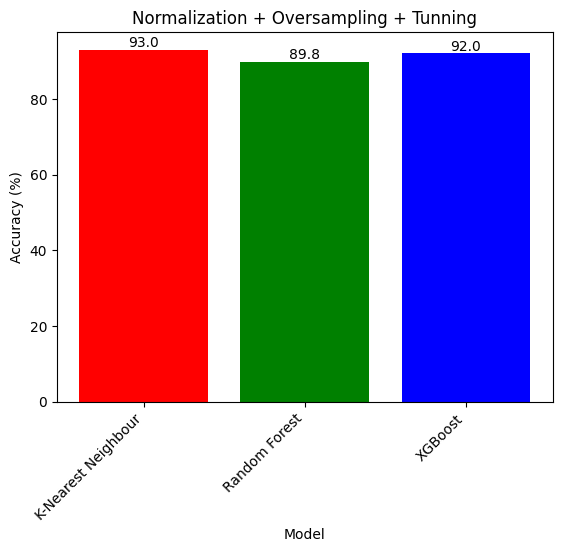

In [119]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars :
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

### d. Best Model Comparison

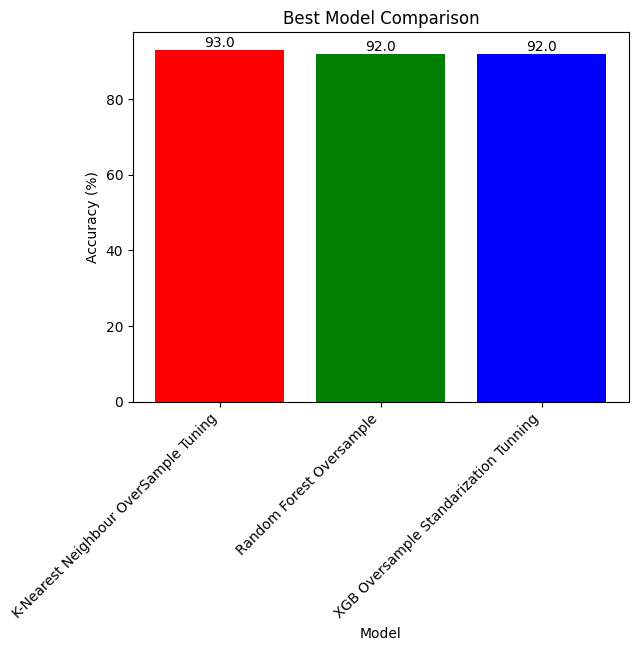

In [120]:
# Data Frame
model_compBest = pd.DataFrame({
    'Model' : ['K-Nearest Neighbour OverSample Tuning', 'Random Forest Oversample', 'XGB Oversample Standarization Tunning'],
    'Accuracy' : [accuracy_knn_smote_normal_tun*100, accuracy_rf_smote_normal*100, accuracy_xgb_smote_normal_tun*100]
})

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Best Model Comparison')
plt.xticks(rotation=45, ha='right') # Untuk memutar label sumbu-x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
  yval = bar.get_height()
  plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## 9. Streamlit

Pada bagian ini, kita mengimplementasikan penggunaan Streamlit, sebuah framework Python untuk membuat aplikasi web dengan cepat dan mudah. Code yang diberikan bertujuan untuk menyimpan model yang sudah di-train ke dalam file menggunakan modul pickle dan juga menyimpan informasi terkait model ke dalam file terpisah.

In [123]:
import pickle

#simpan model kedalam file dengan pickle
pickle.dump(knn_model, open('knn_smote_normal_tun_model.pkl', 'wb'))

model_info = {'parameter': dfClean, 'accuracy': accuracy_knn_smote_normal_tun*100}
with open('model_info.pkl', 'wb') as file:
    pickle.dump(model_info, file)

* Kode di atas berfungsi untuk menyimpan model K-Nearest Neighbors (KNN) yang telah melalui proses oversampling, normalisasi, dan tuning parameter ke dalam sebuah file dengan nama 'knn_smote_normal_tun_model.pkl'. Proses dump dari modul pickle digunakan untuk menyimpan objek ke dalam file. 'wb' mengindikasikan bahwa kita akan menulis (write) dalam mode biner ('b').
* Selanjutnya, kita membuat dictionary model_info yang berisi informasi terkait model. Dictionary ini memiliki dua kunci, yaitu 'parameter' yang menyimpan parameter model (diasumsikan berasal dari DataFrame dfClean), dan 'accuracy' yang menyimpan akurasi model setelah proses oversampling, normalisasi, dan tuning parameter.
*Kode di atas bertujuan untuk menyimpan dictionary model_info ke dalam file 'model_info.pkl'. Penggunaan with open(...) as file memastikan bahwa file ditutup setelah proses selesai. pickle.dump(model_info, file) digunakan untuk menyimpan objek dictionary ke dalam file yang bersifat biner.

Kode di atas adalah langkah-langkah akhir dari proses pembuatan model, di mana model KNN yang sudah di-oversample, dinormalisasi, dan dituning parameternya disimpan ke dalam file 'knn_smote_normal_tun_model.pkl'. Selain itu, informasi terkait model, termasuk parameter dan akurasi, disimpan dalam file 'model_info.pkl'. Langkah ini mempersiapkan model untuk diintegrasikan dengan aplikasi web menggunakan Streamlit.

## 10. Kesimpulan

Dari hasil penelitian di atas, setelah melakukan pemodelan dengan algoritma KNN, Random Forest, dan XGBoost dengan berbagai penanganan data, seperti penggunaan random oversampling SMOTE untuk menangani ketidakseimbangan data, RandomSearchCV untuk tuning, dan normalisasi data, dapat diambil beberapa kesimpulan.

* Pertama, pada penggunaan model Random Oversampling SMOTE tanpa normalisasi pada KNN menghasilkan akurasi sebesar 75.4%, sedangkan model Random Forest dan XGBoost masing-masing memiliki akurasi 92% dan 90.4%.

* Kedua, ketika data sudah dilakukan normalisasi dan Random Oversampling SMOTE, model KNN mencapai akurasi sebesar 86.1%, Random Forest tetap pada akurasi 92%, dan XGBoost dengan akurasi 90.4%.

* Terakhir, pada penggunaan data yang telah melalui tunning RandomSearchCV, normalisasi, dan Random Oversampling SMOTE, model KNN mencapai akurasi tertinggi sebesar 93%, sementara Random Forest mengalami penurunan akurasi menjadi 87.7%, dan XGBoost tetap pada akurasi 92%.

Dengan demikian, penanganan optimal terhadap ketidakseimbangan data yang melibatkan metode Random Oversampling SMOTE, tuning menggunakan RandomSearchCV, dan normalisasi data memberikan hasil yang signifikan dalam peningkatan akurasi model klasifikasi, terutama pada model KNN dan XGBoost. Meskipun demikian, penanganan tersebut tidak selalu menghasilkan peningkatan akurasi pada model Random Forest, yang justru mengalami penurunan yang signifikan. Keseluruhan, penanganan ketidakseimbangan data dengan menggunakan tunning parameter, normalisasi, dan oversampling dapat memberikan dampak yang signifikan terhadap performa model klasifikasi. Pemilihan model terbaik dan parameter optimal mampu meningkatkan akurasi dan kinerja model secara menyeluruh.